In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('insurance.csv', delimiter=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   region    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


In [ ]:
df.head()

,age,bmi,children,region,charges
0,19,27.900,0,southwest,16884.92400
1,18,33.770,1,southeast,1725.55230
2,28,33.000,3,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520


In [ ]:
df.isna().sum()

age         0
bmi         0
children    0
region      0
charges     0
dtype: int64

In [ ]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

age         0.0
bmi         0.0
children    0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
dummies = pd.get_dummies(df['region'], prefix="region", drop_first=True)

In [ ]:
dummies = dummies.astype(int)

In [ ]:
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.drop(columns=['region'], inplace=True)

In [ ]:
df.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,1
1,18,33.770,1,1725.55230,0,1,0
2,28,33.000,3,4449.46200,0,1,0
3,33,22.705,0,21984.47061,1,0,0
4,32,28.880,0,3866.85520,1,0,0


In [ ]:
X = df.drop(columns=['charges'])
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
f'X train length: {len(X_train)}, X test length: {len(X_test)}, y train length: {len(y_train)}, y test length: {len(y_test)}'

'X train length: 1070, X test length: 268, y train length: 1070, y test length: 268'

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

module = abs(df_pred['Actual'] - df_pred['Predicted'])
df_pred['Module'] = module

In [ ]:
df_pred.head()

,Actual,Predicted,Module
764,9095.06825,13982.989999,4887.921749
887,5272.17580,11344.508456,6072.332656
890,29330.98315,16562.785288,12768.197862
1293,9301.89355,13905.791777,4603.898227
259,33750.29180,8175.170880,25575.120920


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 130473257.44807306, R^2 Score: 0.15958567780641264'

In [ ]:
import matplotlib.pyplot as plt

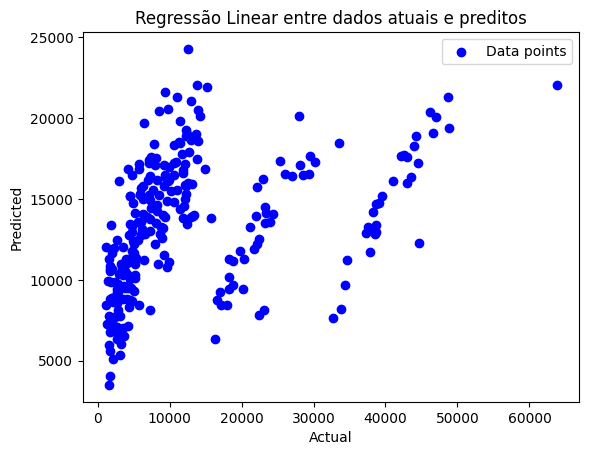

In [ ]:
plt.scatter(df_pred['Actual'], df_pred['Predicted'], color='blue', label='Data points')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regressão Linear entre dados atuais e preditos')
plt.legend()
plt.show()